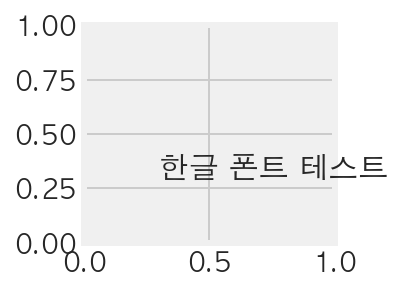

In [72]:
# Data processing
# ==============================================================================
import os 
import datatable


import pandas as pd
import numpy as np
import openpyxl
import math
import datetime as dt

# Plots
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid',font_scale=1.2) 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

## * 이 셀이 제대로 작동하지 않고 길게 warning 메시지가 나올 경우, 상단의 메뉴에서 <런타임>-<런타임 다시 시작>을 클릭한 뒤 처음부터 코드를 실행하세요 
# 그래프 한글 폰트 설정

import matplotlib 
import platform 
from matplotlib import font_manager, rc 
%config InlineBackend.figure_format = 'retina'

# '-' 부호가 제대로 표시되게 하는 설정 
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정 
if platform.system() == 'Windows': # 윈도우
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
elif platform.system() == 'Darwin': #맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux': # 리눅스
    rc('font', family='NanumBarunGothic')

#폰트 선명하게 보이게 하기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [73]:
train = pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/train_1011_1.csv')
test = pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/test_1011_1.csv')

In [108]:
train2 = train.copy()
test2 = test.copy()

In [109]:
print('train2:',train2.shape)
print('test2:',test2.shape)

train2: (10264386, 23)
test2: (3255482, 23)


In [110]:
print(train2.isna().sum().sum())
print(test2.isna().sum().sum())

21788509
7625676


# personal_rehabilitation_yn

### train

In [111]:
#loanapply_insert_time-04-18 13:38:29 이전 NA ->(no response)으로 채우기
#pd.set_option("display.max_columns",None)

train2.loc[(train2['loanapply_insert_time']<"2022-04-18 13:38:29"),'personal_rehabilitation_yn']="no_response"
train2[train2.loanapply_insert_time <"2022-04-18 13:38:29"]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0,681184,1974.0,1.0,...,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,no_response,NaN,4.0,20000000.0
1,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,NaN,3.0,11000000.0
2,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,NaN,3.0,11000000.0
3,180433,2022-03-01 00:12:06,21,196,3000000.0,10.9,1.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,NaN,3.0,11000000.0
4,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0,752985,1997.0,1.0,...,FREELANCER,202102.0,기타,기타가족소유,3000000.0,생활비,no_response,NaN,7.0,33000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263927,1817476,2022-04-18 13:38:05,47,43,32000000.0,17.5,0.0,451198,1979.0,0.0,...,EARNEDINCOME,201311.0,정규직,기타가족소유,17000000.0,대환대출,no_response,NaN,3.0,30000000.0
5263928,1571359,2022-04-18 13:38:06,1,61,24000000.0,13.9,1.0,631263,1973.0,1.0,...,PRIVATEBUSINESS,201206.0,기타,자가,10000000.0,생활비,no_response,NaN,3.0,190000000.0
5263929,2144773,2022-04-18 13:38:11,49,136,10000000.0,6.6,1.0,59819,1993.0,1.0,...,EARNEDINCOME2,202007.0,정규직,기타가족소유,3000000.0,생활비,no_response,NaN,3.0,46000000.0
5263930,669275,2022-04-18 13:38:15,27,176,30000000.0,11.9,0.0,173486,1980.0,1.0,...,EARNEDINCOME,201806.0,정규직,전월세,10000000.0,생활비,no_response,NaN,NaN,NaN


In [112]:
#2022-04-18 13:38:29 이후 NA ->(No_response)로 채우기 
train2.loc[(train2['loanapply_insert_time']>="2022-04-18 13:38:29")&(train2['personal_rehabilitation_yn'].isna()),'personal_rehabilitation_yn']="no_response"
train2[train2.loanapply_insert_time >="2022-04-18 13:38:29"]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
5263932,1437157,2022-04-18 13:38:30,42,258,38000000.0,9.5,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,0.0,3.0,74000000.0
5263933,1437157,2022-04-18 13:38:30,61,92,34000000.0,11.5,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,0.0,3.0,74000000.0
5263934,1437157,2022-04-18 13:38:30,13,262,37000000.0,16.1,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,0.0,3.0,74000000.0
5263935,1437157,2022-04-18 13:38:30,30,121,15000000.0,13.0,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,0.0,3.0,74000000.0
5263936,1437157,2022-04-18 13:38:30,50,142,60000000.0,14.0,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,0.0,3.0,74000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,455157,2022-05-31 23:54:28,35,168,3000000.0,18.3,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,0.0,12.0,293000000.0
10264382,455157,2022-05-31 23:54:28,55,159,3000000.0,18.9,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,0.0,12.0,293000000.0
10264383,455157,2022-05-31 23:54:29,22,221,5000000.0,18.4,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,0.0,12.0,293000000.0
10264384,455157,2022-05-31 23:54:37,38,16,3000000.0,14.5,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,0.0,12.0,293000000.0


In [113]:
train2["personal_rehabilitation_yn"].isna().sum()

0

### test

In [114]:
test2["personal_rehabilitation_yn"].isna().sum()

15463

In [115]:
#test는 모두 2022-04-18 13:38:29 이후 NA ->(No_response)로 채우기 
test2.loc[(test2['personal_rehabilitation_yn'].isna()),'personal_rehabilitation_yn']="no_response"

test2["personal_rehabilitation_yn"].isna().sum()

0

# personal_rehabilitation_complete_yn

### train

In [116]:
train2["personal_rehabilitation_complete_yn"].isna().sum()

9227205

In [117]:
# personal_rehabilitation 가 0이면(개인회생자 아님) no-rehabilitation

train2.loc[(train2['personal_rehabilitation_yn']==0),'personal_rehabilitation_complete_yn']="no_rehabilitation"
train2.loc[train2['personal_rehabilitation_yn']==0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
5263932,1437157,2022-04-18 13:38:30,42,258,38000000.0,9.5,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,no_rehabilitation,3.0,74000000.0
5263933,1437157,2022-04-18 13:38:30,61,92,34000000.0,11.5,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,no_rehabilitation,3.0,74000000.0
5263934,1437157,2022-04-18 13:38:30,13,262,37000000.0,16.1,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,no_rehabilitation,3.0,74000000.0
5263935,1437157,2022-04-18 13:38:30,30,121,15000000.0,13.0,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,no_rehabilitation,3.0,74000000.0
5263936,1437157,2022-04-18 13:38:30,50,142,60000000.0,14.0,0.0,485729,1995.0,1.0,...,EARNEDINCOME,202012.0,정규직,자가,60000000.0,생활비,0.0,no_rehabilitation,3.0,74000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,455157,2022-05-31 23:54:28,35,168,3000000.0,18.3,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,no_rehabilitation,12.0,293000000.0
10264382,455157,2022-05-31 23:54:28,55,159,3000000.0,18.9,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,no_rehabilitation,12.0,293000000.0
10264383,455157,2022-05-31 23:54:29,22,221,5000000.0,18.4,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,no_rehabilitation,12.0,293000000.0
10264384,455157,2022-05-31 23:54:37,38,16,3000000.0,14.5,0.0,717233,1973.0,1.0,...,EARNEDINCOME,199704.0,정규직,자가,50000000.0,대환대출,0.0,no_rehabilitation,12.0,293000000.0


In [118]:
# personal_rehabilitation 가 no_response -> no_response

train2.loc[(train2['personal_rehabilitation_yn']=="no_response"),'personal_rehabilitation_complete_yn']="no_response"
train2.loc[train2['personal_rehabilitation_yn']=="no_response"]


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0,681184,1974.0,1.0,...,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,no_response,no_response,4.0,20000000.0
1,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
2,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
3,180433,2022-03-01 00:12:06,21,196,3000000.0,10.9,1.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
4,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0,752985,1997.0,1.0,...,FREELANCER,202102.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,7.0,33000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256217,173189,2022-05-31 21:36:12,62,200,11000000.0,14.8,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256218,173189,2022-05-31 21:36:14,35,29,1000000.0,18.3,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256219,173189,2022-05-31 21:36:14,38,223,28000000.0,17.3,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256220,173189,2022-05-31 21:36:16,22,164,15000000.0,8.0,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN


In [119]:
# personal_rehabilitation 가 no_response -> no_response
train2.loc[(train2['personal_rehabilitation_yn']=="no_response"),'personal_rehabilitation_complete_yn']="no_response"
train2.loc[train2['personal_rehabilitation_yn']=="no_response"]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0,681184,1974.0,1.0,...,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,no_response,no_response,4.0,20000000.0
1,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
2,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
3,180433,2022-03-01 00:12:06,21,196,3000000.0,10.9,1.0,623737,1997.0,1.0,...,FREELANCER,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0
4,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0,752985,1997.0,1.0,...,FREELANCER,202102.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,7.0,33000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256217,173189,2022-05-31 21:36:12,62,200,11000000.0,14.8,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256218,173189,2022-05-31 21:36:14,35,29,1000000.0,18.3,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256219,173189,2022-05-31 21:36:14,38,223,28000000.0,17.3,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN
10256220,173189,2022-05-31 21:36:16,22,164,15000000.0,8.0,0.0,569416,1968.0,1.0,...,EARNEDINCOME2,201301.0,계약직,전월세,10000000.0,생활비,no_response,no_response,NaN,NaN


In [120]:
train2["personal_rehabilitation_complete_yn"].isna().sum()

0

In [121]:
train2.personal_rehabilitation_yn.value_counts()

no_response    5870447
0.0            4370919
1.0              23020
Name: personal_rehabilitation_yn, dtype: int64

In [122]:
train2.personal_rehabilitation_complete_yn.value_counts()

no_response          5870447
no_rehabilitation    4370919
0.0                    18926
1.0                     4094
Name: personal_rehabilitation_complete_yn, dtype: int64

### test

In [123]:
test2["personal_rehabilitation_complete_yn"].isna().sum()

2560283

In [124]:
test2["personal_rehabilitation_complete_yn"].value_counts(dropna=False)

NaN    2560283
0.0     692666
1.0       2533
Name: personal_rehabilitation_complete_yn, dtype: int64

In [125]:
# personal_rehabilitation 가 0이면(개인회생자 아님) no-rehabilitation

test2.loc[(test2['personal_rehabilitation_yn']==0),'personal_rehabilitation_complete_yn']="no_rehabilitation"
test2.loc[test2['personal_rehabilitation_yn']==0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1,506292,2022-06-01 00:12:24,27,148,13000000.0,7.2,NaN,669202,1981.0,1.0,...,EARNEDINCOME,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
2,506292,2022-06-01 00:12:24,59,251,11000000.0,6.8,NaN,669202,1981.0,1.0,...,EARNEDINCOME,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
3,506292,2022-06-01 00:12:24,19,231,24000000.0,15.6,NaN,669202,1981.0,1.0,...,EARNEDINCOME,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
4,506292,2022-06-01 00:12:25,56,5,2000000.0,18.5,NaN,669202,1981.0,1.0,...,EARNEDINCOME,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
5,506292,2022-06-01 00:12:34,19,127,13000000.0,9.5,NaN,669202,1981.0,1.0,...,EARNEDINCOME,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255477,634459,2022-06-30 23:54:48,19,231,11000000.0,16.6,NaN,244440,2000.0,1.0,...,PRACTITIONER,20220501.0,정규직,기타가족소유,5000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
3255478,634459,2022-06-30 23:54:48,10,149,30000000.0,14.5,NaN,244440,2000.0,1.0,...,PRACTITIONER,20220501.0,정규직,기타가족소유,5000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
3255479,634459,2022-06-30 23:54:48,10,65,30000000.0,14.5,NaN,244440,2000.0,1.0,...,PRACTITIONER,20220501.0,정규직,기타가족소유,5000000.0,생활비,0.0,no_rehabilitation,1.0,NaN
3255480,1288711,2022-06-30 23:54:52,35,267,3000000.0,13.8,NaN,450880,1976.0,0.0,...,PRACTITIONER,20010501.0,정규직,자가,50000000.0,대환대출,0.0,no_rehabilitation,NaN,NaN


In [126]:
# personal_rehabilitation 가 no_response -> no_response
test2.loc[(test2['personal_rehabilitation_yn']=="no_response"),'personal_rehabilitation_complete_yn']="no_response"
test2.loc[test2['personal_rehabilitation_yn']=="no_response"]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1098,179316,2022-06-01 00:40:35,55,25,26000000.0,14.5,NaN,519250,1991.0,1.0,...,FREELANCER,202110.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,NaN,NaN
1099,179316,2022-06-01 00:40:35,29,265,28000000.0,8.1,NaN,519250,1991.0,1.0,...,FREELANCER,202110.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,NaN,NaN
1104,179316,2022-06-01 00:40:35,42,249,7000000.0,9.6,NaN,519250,1991.0,1.0,...,FREELANCER,202110.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,NaN,NaN
1107,179316,2022-06-01 00:40:35,35,29,5000000.0,14.5,NaN,519250,1991.0,1.0,...,FREELANCER,202110.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,NaN,NaN
1110,179316,2022-06-01 00:40:35,13,262,30000000.0,16.4,NaN,519250,1991.0,1.0,...,FREELANCER,202110.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246475,526892,2022-06-30 21:18:41,27,176,14000000.0,13.7,NaN,46505,1992.0,0.0,...,EARNEDINCOME,20201001.0,정규직,전월세,10000000.0,투자,no_response,no_response,NaN,NaN
3246477,526892,2022-06-30 21:18:47,29,75,21000000.0,8.1,NaN,46505,1992.0,0.0,...,EARNEDINCOME,20201001.0,정규직,전월세,10000000.0,투자,no_response,no_response,NaN,NaN
3246478,526892,2022-06-30 21:18:48,22,164,20000000.0,8.7,NaN,46505,1992.0,0.0,...,EARNEDINCOME,20201001.0,정규직,전월세,10000000.0,투자,no_response,no_response,NaN,NaN
3246479,526892,2022-06-30 21:18:48,22,100,8000000.0,15.3,NaN,46505,1992.0,0.0,...,EARNEDINCOME,20201001.0,정규직,전월세,10000000.0,투자,no_response,no_response,NaN,NaN


In [127]:
test2["personal_rehabilitation_complete_yn"].isna().sum()

0

In [128]:
test2.personal_rehabilitation_yn.value_counts()

0.0            3221862
1.0              18157
no_response      15463
Name: personal_rehabilitation_yn, dtype: int64

In [129]:
test2.personal_rehabilitation_complete_yn.value_counts()

no_rehabilitation    3221862
0.0                    15624
no_response            15463
1.0                     2533
Name: personal_rehabilitation_complete_yn, dtype: int64

# birth_year & company_enter_month

## outlier

In [130]:
#1011 이상치만 제거

# outlier제거를 위한 변수 만들기
#입사연월에서 연도만 뺀 변수 만들기 : company_enter_year
train2['company_enter_year']=train2['company_enter_month'].apply(str).str[0:4].apply(float)
train2['company_enter_year']


0              NaN
1           2022.0
2           2022.0
3           2022.0
4           2021.0
             ...  
10264381    1997.0
10264382    1997.0
10264383    1997.0
10264384    1997.0
10264385    2019.0
Name: company_enter_year, Length: 10264386, dtype: float64

In [131]:
#age, working_year 변수 만들기 
train2['age'] = 2022 - train2['birth_year'] +1
train2['working_year'] = 2022 - train2['company_enter_year']+1


train2.loc[(train2['age']-train2['working_year'])<=0] #태어나기도 전에 일한사람? 731 rows 


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_year,age,working_year
983678,706921,2022-03-10 12:59:58,18,188,100000000.0,6.3,0.0,505707,1997.0,1.0,...,전월세,16000000.0,생활비,no_response,no_response,NaN,NaN,1997.0,26.0,26.0
983679,706921,2022-03-10 12:59:58,52,234,50000000.0,4.6,0.0,505707,1997.0,1.0,...,전월세,16000000.0,생활비,no_response,no_response,NaN,NaN,1997.0,26.0,26.0
983680,706921,2022-03-10 12:59:58,45,119,66000000.0,4.3,0.0,505707,1997.0,1.0,...,전월세,16000000.0,생활비,no_response,no_response,NaN,NaN,1997.0,26.0,26.0
983699,706921,2022-03-10 13:00:00,25,169,25000000.0,18.9,0.0,505707,1997.0,1.0,...,전월세,16000000.0,생활비,no_response,no_response,NaN,NaN,1997.0,26.0,26.0
983700,706921,2022-03-10 13:00:00,34,40,50000000.0,18.9,0.0,505707,1997.0,1.0,...,전월세,16000000.0,생활비,no_response,no_response,NaN,NaN,1997.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963815,83162,2022-05-29 09:08:28,29,265,34000000.0,9.0,0.0,313726,1995.0,1.0,...,자가,200000000.0,주택구입,0.0,no_rehabilitation,NaN,NaN,1990.0,28.0,33.0
9963816,83162,2022-05-29 09:08:28,14,128,8000000.0,17.9,0.0,313726,1995.0,1.0,...,자가,200000000.0,주택구입,0.0,no_rehabilitation,NaN,NaN,1990.0,28.0,33.0
9963817,83162,2022-05-29 09:08:28,42,258,38000000.0,13.1,0.0,313726,1995.0,1.0,...,자가,200000000.0,주택구입,0.0,no_rehabilitation,NaN,NaN,1990.0,28.0,33.0
9963818,83162,2022-05-29 09:08:28,1,61,69000000.0,12.4,0.0,313726,1995.0,1.0,...,자가,200000000.0,주택구입,0.0,no_rehabilitation,NaN,NaN,1990.0,28.0,33.0


In [132]:
#나이가 근속기간보다 많으면 company_enter_month  NA 처리  

#ujic.loc[(ujic['age']-ujic['working_year'])<=0, "birth_year"]=np.nan
train2.loc[(train2['age']-train2['working_year'])<=0, "company_enter_month"]=np.nan

del train2['working_year']
del train2['age']
del train2['company_enter_year']

In [133]:
test2['company_enter_year']=test2['company_enter_month'].apply(str).str[0:4].apply(float)

test2['age'] = 2022 - test2['birth_year'] +1
test2['working_year'] = 2022 - test2['company_enter_year']+1

test2.loc[(test2['age']-test2['working_year'])<=0, "company_enter_month"]=np.nan

del test2['working_year']
del test2['age']
del test2['company_enter_year']

In [134]:
train2.loc[train2["company_enter_month"]<197000.0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1616502,1769164,2022-03-16 10:58:47,45,119,4000000.0,3.2,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616504,1769164,2022-03-16 10:58:47,35,29,5000000.0,15.5,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616505,1769164,2022-03-16 10:58:47,44,8,5000000.0,14.6,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616506,1769164,2022-03-16 10:58:47,13,262,50000000.0,13.4,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616509,1769164,2022-03-16 10:58:47,57,71,50000000.0,10.2,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616510,1769164,2022-03-16 10:58:47,55,12,50000000.0,11.1,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616511,1769164,2022-03-16 10:58:47,42,258,44000000.0,9.5,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616512,1769164,2022-03-16 10:58:47,29,265,34000000.0,7.0,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616515,1769164,2022-03-16 10:58:47,30,121,50000000.0,12.5,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN
1616523,1769164,2022-03-16 10:58:48,3,152,30000000.0,9.9,0.0,284238,NaN,NaN,...,PRIVATEBUSINESS,194201.0,정규직,자가,1.000000e+10,생활비,no_response,no_response,NaN,NaN


In [135]:
index1=train2[train2["company_enter_month"]<197000.0].index #application_id : 1769164 - 1942.0년 입사 : 삭제
print(len(index1)) 
print(train2.shape) 
#1명 


37
(10264386, 23)


In [136]:
train2.drop(index1, inplace=True)
print(train2.shape)

(10264349, 23)


In [137]:
test2.loc[test2["company_enter_month"]<197000.0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


## na 처리

### train

In [138]:
print(train2['birth_year'].isna().sum())

train2['company_enter_year']=train2['company_enter_month'].apply(str).str[0:4].apply(float)
train2['company_enter_year'].unique()

train2['age'] = 2022 - train2['birth_year'] +1
train2['working_year'] = 2022 - train2['company_enter_year']+1

train2['working_year'].unique()

76951


array([nan,  1.,  2.,  8., 18.,  3., 21.,  6.,  7.,  5., 11.,  9.,  4.,
       14., 10., 22., 26., 19., 15., 23., 13., 16., 12., 17., 20., 33.,
       28., 30., 36., 27., 37., 24., 48., 25., 29., 32., 34., 31., 38.,
       35., 39., 44., 49., 42., 41., 40., 43., 53., 52., 46.])

In [139]:
# income_type & employment_type 모두 기타(OTHERINCOME 기타)인 경우 "무직"_ isjob

train2["isjob"]=1
condition =(train2["income_type"]=="OTHERINCOME") & (train2["employment_type"]=="기타") 
train2.loc[condition,"isjob"]=0

mujic = train2.loc[train2["isjob"]==0,:] #무직
ujic=train2.loc[train2["isjob"]==1,:] #유직 
print(train2.shape)
print(mujic.shape)
print(ujic.shape)

#무직이면 company_enter_month가 0
mujic["company_enter_month"]=0

#무직인데 birth_year가 NA인 경우 -> 3148(531명)
print(mujic["birth_year"].isna().sum())
print(mujic[mujic["birth_year"].isna()].user_id.nunique())

birthyear_mean= int(mujic["birth_year"].mean())
birthyear_sd= int(mujic["birth_year"].std())


print(birthyear_mean) #mean 1979
print(birthyear_sd) #sd 12

(10264349, 27)
(302362, 27)
(9961987, 27)
3148
531
1979
12


In [140]:
import random
random.seed(34)
birthyear=list(range(birthyear_mean-2*birthyear_sd, birthyear_mean+2*birthyear_sd))
birthyearlist= list(random.choice(birthyear) for i in range(531))
useridlist=list(mujic.loc[mujic["birth_year"].isna(),"user_id"].unique())

print(len(birthyearlist))
print(len(useridlist))
birthyearlist

531
531


[1988,
 1977,
 1992,
 1956,
 1969,
 1956,
 1979,
 1978,
 1959,
 1982,
 1974,
 1976,
 1961,
 1992,
 1987,
 1964,
 1961,
 1972,
 1977,
 1994,
 1955,
 1964,
 1988,
 1960,
 1958,
 1978,
 1971,
 2002,
 1990,
 2000,
 1958,
 1979,
 1965,
 1992,
 1995,
 1974,
 1973,
 1979,
 1975,
 1968,
 1968,
 1983,
 1989,
 1966,
 1993,
 1963,
 1991,
 2000,
 1980,
 1989,
 1982,
 1970,
 1970,
 1998,
 1962,
 1992,
 1997,
 2002,
 1959,
 1983,
 1972,
 1981,
 1962,
 1992,
 1973,
 1967,
 1966,
 1980,
 1976,
 1983,
 1960,
 1988,
 2002,
 1985,
 1981,
 1984,
 1978,
 1963,
 1983,
 1972,
 1963,
 1969,
 1965,
 1973,
 1974,
 1959,
 1974,
 1988,
 1961,
 1992,
 1988,
 1974,
 1981,
 1969,
 1981,
 1974,
 1989,
 2001,
 1977,
 2002,
 1994,
 1984,
 1959,
 1959,
 2001,
 1958,
 1976,
 1981,
 1975,
 1966,
 1966,
 2002,
 1981,
 1976,
 1985,
 1978,
 1997,
 1972,
 1955,
 2000,
 1994,
 1995,
 1971,
 1987,
 1989,
 1958,
 1965,
 1972,
 1962,
 1987,
 1971,
 1960,
 1997,
 1990,
 1984,
 1964,
 1971,
 1996,
 1999,
 1964,
 1984,
 1966,
 1996,

In [141]:
diction= pd.DataFrame({"birth_year2": birthyearlist, "user_id": useridlist})

mujic = pd.merge(mujic, diction,how="left", on="user_id")
mujic.head()

# 결측치이면 birth_year2로 대체
mujic["birth_year"].fillna(mujic["birth_year2"], inplace=True)

# 불필요한 열 삭제 
del mujic['birth_year2']

mujic["birth_year"].isna().sum()

mujic["birth_year"].unique()

array([1974., 1971., 1980., 1997., 1982., 1958., 1973., 1969., 1993.,
       1976., 1999., 1978., 1995., 1955., 1981., 1984., 1959., 1996.,
       1972., 1998., 1986., 1991., 1987., 1994., 1979., 1946., 1966.,
       1948., 1968., 1989., 1962., 1983., 2000., 1965., 1967., 1977.,
       1952., 1951., 1970., 1988., 1957., 1975., 1932., 1963., 1964.,
       1985., 1992., 1961., 1990., 1940., 1953., 1942., 2001., 1954.,
       1956., 1960., 2002., 1939., 1936., 1937., 1947., 1943., 1944.,
       1933., 1949., 1950., 1945., 1938., 1941., 2003., 1935., 1934.,
       1930.])

In [142]:
#유직인 경우 -73803건(2792명 )
print(ujic['birth_year'].isna().sum()) 
print(ujic[ujic["birth_year"].isna()].user_id.nunique())
# outlier 제거

# outlier제거를 위한 변수 만들기
#입사연월에서 연도만 뺀 변수 만들기
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']

ujic['age'] = 2022 - ujic['birth_year'] +1
ujic['working_year'] = 2022 - ujic['company_enter_year']+1


ujic.loc[(ujic['age']-ujic['working_year'])<=0] #태어나기도 전에 일한사람? 0명

73803
2792


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_year,age,working_year,isjob


In [143]:
#나이가 근속기간보다 많으면 company_enter_month  NA 처리  

ujic.loc[(ujic['age']-ujic['working_year'])<=0, "company_enter_month"]=np.nan

del ujic['working_year']
del ujic['age']

ujic[ujic["company_enter_month"]<197000.0] 



,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_year,isjob


In [145]:
index1=ujic[ujic["company_enter_month"]<197000.0].index #application_id : 1769164 - 1942.0년 입사 : 삭제
print(len(index1)) #0명 

print(ujic.shape)


0
(9961987, 25)


In [146]:
#1) 유직인 경우 birth_year NA & company_enter_month가 NA : 
#2) 유직인 경우 birth_year NA & company_enter_month가 존재 : **이게 문제였었다 
#3) 유직인 경우 birth_year 존재 & company_enter_month가 NA : -> 나중에 
print(ujic['birth_year'].isna().sum()) #

print(ujic.loc[(ujic["birth_year"].isna())&(ujic["company_enter_month"].isna()),:].shape) #
print(ujic.loc[(ujic["birth_year"].isna())&(ujic["company_enter_month"].notna()),:].shape) #
print(ujic.loc[(ujic["birth_year"].notna())&(ujic["company_enter_month"].isna()),:].shape) # 
print(ujic.loc[(ujic["birth_year"].notna())&(ujic["company_enter_month"].notna()),:].shape) #

#1) 유직인 경우 birth_year NA & company_enter_month가 존재 
######company_enter_year -birth year별로 태어난 후, 직장을 가질때까지 기간의 median 
#birth_year + employee_type별 입사까지 걸린 시간 : enter_time 
ujic1= ujic[ujic["company_enter_month"].notna()] #company_enter_year가 존재  9959518
ujic2= ujic[ujic["company_enter_month"].isna()]  #company_enter_year가 존재하지 않음  2469
print(ujic1.shape)
print(ujic2.shape)

ujic1["entertime"] = ujic1["company_enter_year"] - ujic1["birth_year"]
birthyear_df=pd.DataFrame(ujic1[ujic1["income_type"]!="OTHERINCOME"].groupby(["company_enter_year"])["entertime"].median()).reset_index()
birthyear_df["birth_year"] = birthyear_df["company_enter_year"]-birthyear_df["entertime"]
print(birthyear_df.isna().sum())


print(ujic1.shape)
ujic1= pd.merge(ujic1, birthyear_df, how="left", on=["company_enter_year"])
print(ujic1.shape)

#결측치 처리
print(ujic1.birth_year_y.isna().sum())
ujic1["birth_year_x"].fillna(ujic1["birth_year_y"], inplace=True)


# 불필요한 열 삭제 
del ujic1['entertime_x']
del ujic1['entertime_y']
del ujic1['birth_year_y']

ujic1.rename(columns={"birth_year_x": "birth_year"}, inplace=True)

print(ujic1.birth_year.isna().sum())

73803
(1, 25)
(73802, 25)
(2468, 25)
(9885716, 25)
(9959518, 25)
(2469, 25)
company_enter_year    0
entertime             0
birth_year            0
dtype: int64
(9959518, 26)
(9959518, 28)
0
0


In [147]:
#2) company_enter_month가 na인 경우 birth_year 처리 -random 

# train에서 만든 birthyear_mean, birthyear_sd 생성 
print(ujic2["birth_year"].isna().sum()) #1 NA
print(ujic2[ujic2["birth_year"].isna()].user_id.nunique()) #1

birthyear_mean= int(ujic["birth_year"].mean())
birthyear_sd= int(ujic["birth_year"].std())

print(birthyear_mean) #mean 1982
print(birthyear_sd) #sd 9

random.seed(34)
birthyear=list(range(birthyear_mean-2*birthyear_sd, birthyear_mean+2*birthyear_sd))
birthyearlist= list(random.choice(birthyear) for i in range(1)) ##음
useridlist=list(ujic2.loc[ujic2["birth_year"].isna(),"user_id"].unique())

print(len(birthyearlist))
print(len(useridlist))

diction= pd.DataFrame({"birth_year2": birthyearlist, "user_id": useridlist})

ujic2 = pd.merge(ujic2, diction,how="left", on="user_id")
ujic2.head()

# 결측치이면 birth_year2로 대체
ujic2["birth_year"].fillna(ujic2["birth_year2"], inplace=True)

# 불필요한 열 삭제 
del ujic2['birth_year2']
print(ujic2["birth_year"].isna().sum())
ujic2["birth_year"].unique()

#유직 합치기 
print(ujic1.shape)
print(ujic2.shape)
ujic=pd.concat([ujic1, ujic2])
print(ujic.shape)

#결측치 확인 
print(ujic.isna().sum()) #company_enter_month NA 존재 
print(mujic.isna().sum())

1
1
1982
9
1
1
0
(9959518, 25)
(2469, 25)
(9961987, 25)
application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                   73803
insert_time                                  0
credit_score                           1069446
yearly_income                                0
income_type                                  0
company_enter_month                       2469
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
pers

In [148]:
#한번 더 checking! 
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']

ujic['age'] = 2022 - ujic['birth_year'] +1
ujic['working_year'] = 2022 - ujic['company_enter_year']+1


ujic.loc[(ujic['age']-ujic['working_year'])<=0]



,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_year,isjob,age,working_year


In [149]:
ujic.drop(['company_enter_year','working_year','age'],axis=1, inplace=True)
ujic.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,isjob
0,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0,623737,1997.0,1.0,...,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0,1
1,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0,623737,1997.0,1.0,...,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0,1
2,180433,2022-03-01 00:12:06,21,196,3000000.0,10.9,1.0,623737,1997.0,1.0,...,202202.0,일용직,기타가족소유,3000000.0,생활비,no_response,no_response,3.0,11000000.0,1
3,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0,752985,1997.0,1.0,...,202102.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,7.0,33000000.0,1
4,1657888,2022-03-01 00:12:06,42,216,3000000.0,13.5,0.0,752985,1997.0,1.0,...,202102.0,기타,기타가족소유,3000000.0,생활비,no_response,no_response,7.0,33000000.0,1


In [150]:
## 유직인 경우 company_enter_year NA -birth_year별로 입사까지 걸린 시간
print(ujic["company_enter_month"].isna().sum()) #2733건 

#company_enter_year, company_enter_onlymonth 변수 생성
#company_enter_year
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']
print(ujic["company_enter_year"].isna().sum())
print(ujic["company_enter_year"].unique())

#company_enter_onlymonth
ujic['company_enter_onlymonth']=ujic['company_enter_month'].apply(str).str[4:6]

#빈칸이면 NA
ujic['company_enter_onlymonth'].replace('', np.nan, inplace=True)
ujic['company_enter_onlymonth']=ujic['company_enter_onlymonth'].apply(float)
print(ujic["company_enter_onlymonth"].isna().sum())
print(ujic["company_enter_onlymonth"].unique())

ujic["entertime"] = ujic["company_enter_year"] - ujic["birth_year"]

enteryear_df=pd.DataFrame(ujic.groupby(["birth_year"])["entertime"].median()).reset_index()
enteryear_df["company_enter_year"] = enteryear_df["birth_year"]+enteryear_df["entertime"]
print(enteryear_df.isna().sum())



ujic= pd.merge(ujic, enteryear_df, how="left", on=["birth_year"])

#결측치이면 company_enter_year 대체
ujic.company_enter_year_x.fillna(ujic.company_enter_year_y, inplace=True)
# 불필요한 열 삭제 
del ujic['entertime_x']
del ujic['entertime_y']
del ujic['company_enter_year_y']

ujic=ujic.rename(columns={"company_enter_year_x":"company_enter_year"})

ujic["company_enter_year"].isna().sum()





2469
2469
[2022. 2021. 2015. 2005. 2020. 2002. 2017. 2016. 2018. 2012. 2014. 2019.
 2009. 2013. 2001. 1997. 2004. 2008. 2000. 2010. 2007. 2011. 2006. 2003.
 1990. 1995. 1993. 1987. 1996. 1986. 1999. 1975. 1998. 1994. 1991. 1989.
 1992. 1985. 1988. 1984. 1979. 1974. 1981. 1982. 1983. 1980. 1970. 1971.
 1977.   nan]
2469
[ 2.  7. 11.  4.  1.  8. 12.  9.  3.  5. 10.  6. nan]
birth_year            0
entertime             0
company_enter_year    0
dtype: int64


0

In [151]:
##### company_enter_onlymonth 처리 - company_enter_year별로 company_enter_onlymonth 최빈값
pd.set_option("display.max_rows",None)

#company_enter_year별로 company_enter_onlymonth 최빈값
month=pd.DataFrame(ujic.groupby("company_enter_year")["company_enter_onlymonth"].apply(pd.Series.mode)).reset_index()
month=month[["company_enter_year","company_enter_onlymonth"]]
ujic.loc[ujic["company_enter_onlymonth"].isna(),"company_enter_year"].value_counts()


print(month.loc[month["company_enter_year"]==2016 ]) #1
print(month.loc[month["company_enter_year"]==2018 ]) #1
print(month.loc[month["company_enter_year"]==2019 ]) #1
print(month.loc[month["company_enter_year"]==2020 ]) #1
print(month.loc[month["company_enter_year"]==2021 ]) #12

ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2016),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2018),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2019),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2020),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2021),"company_enter_onlymonth"]=12


ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==0),"company_enter_onlymonth"] = 0


print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"].shape)
print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"].shape)


print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"].unique())
print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"].unique())



#company_enter_month = company_enter_year + company_enter_onlymonth

ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_month"] = ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"]*100 +ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"] 

print(ujic["company_enter_month"].isna().sum())
print(ujic["company_enter_year"].isna().sum())
print(ujic["company_enter_onlymonth"].isna().sum())

    company_enter_year  company_enter_onlymonth
43              2016.0                      1.0
    company_enter_year  company_enter_onlymonth
45              2018.0                      1.0
    company_enter_year  company_enter_onlymonth
46              2019.0                      1.0
    company_enter_year  company_enter_onlymonth
47              2020.0                      1.0
    company_enter_year  company_enter_onlymonth
48              2021.0                     12.0
(2469,)
(2469,)
[2019. 2020. 2021. 2016. 2018.]
[ 1. 12.]
0
0
0


In [152]:
print(mujic.shape)
print(ujic.shape)
train2=pd.concat([mujic, ujic])
print(train2.shape)


# 불필요한 열 삭제 
del train2['company_enter_onlymonth']
del train2['working_year']
del train2['company_enter_year']
del train2['age']

print(train2.shape)



(302362, 27)
(9961987, 26)
(10264349, 28)
(10264349, 24)


In [153]:
train2.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,isjob
0,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0,681184,1974.0,1.0,...,0.0,기타,전월세,1000000.0,생활비,no_response,no_response,4.0,20000000.0,0
1,38545,2022-03-01 00:14:15,55,12,27000000.0,16.4,0.0,477093,1971.0,0.0,...,0.0,기타,기타가족소유,4000000.0,생활비,no_response,no_response,6.0,30000000.0,0
2,182468,2022-03-01 00:15:52,35,29,3000000.0,17.9,0.0,92495,1980.0,0.0,...,0.0,기타,기타가족소유,30000000.0,대환대출,no_response,no_response,3.0,27000000.0,0
3,182468,2022-03-01 00:15:52,55,12,20000000.0,13.0,0.0,92495,1980.0,0.0,...,0.0,기타,기타가족소유,30000000.0,대환대출,no_response,no_response,3.0,27000000.0,0
4,182468,2022-03-01 00:15:52,14,128,6000000.0,14.9,0.0,92495,1980.0,0.0,...,0.0,기타,기타가족소유,30000000.0,대환대출,no_response,no_response,3.0,27000000.0,0


### test 

In [154]:
print(test2['birth_year'].isna().sum()) #36453

test2['company_enter_year']=test2['company_enter_month'].apply(str).str[0:4].apply(float)
test2['company_enter_year'].unique()

test2['age'] = 2022 - test2['birth_year'] +1
test2['working_year'] = 2022 - test2['company_enter_year']+1

test2['working_year'].unique()

30815


array([nan,  1.,  6.,  2.,  4.,  5., 19., 10.,  3., 11., 14.,  8.,  7.,
       24.,  9., 12., 17., 22., 13., 28., 15., 16., 27., 21., 23., 29.,
       26., 20., 25., 18., 33., 37., 31., 30., 35., 41., 32., 52., 36.,
       38., 34., 39., 42., 46., 43., 53., 40., 44., 51.])

In [155]:
#company_enter_year
test2['company_enter_month']= test2['company_enter_month'].apply(str).str[0:6].apply(float)
test2['company_enter_month'].unique()
print(test2['company_enter_month'].isna().sum())

80836


In [156]:
# income_type & employment_type 모두 기타(OTHERINCOME 기타)인 경우 "무직"_ isjob

test2["isjob"]=1
condition =(test2["income_type"]=="OTHERINCOME") & (test2["employment_type"]=="기타") 
test2.loc[condition,"isjob"]=0

mujic = test2.loc[test2["isjob"]==0,:]
ujic=test2.loc[test2["isjob"]==1,:]
print(test2.shape)
print(mujic.shape)
print(ujic.shape)

#무직이면 company_enter_month가 0
mujic["company_enter_month"]=0

#무직인데 birth_year가 NA인 경우 -> 2871(492)
print(mujic["birth_year"].isna().sum())
print(mujic[mujic["birth_year"].isna()].user_id.nunique())

#train에서 mean 1979
#train에서 sd 12

(3255482, 27)
(96545, 27)
(3158937, 27)
2871
492


In [157]:
import random
random.seed(34)
birthyear=list(range(1979-2*12, 1979+2*12))
birthyearlist= list(random.choice(birthyear) for i in range(492))
useridlist=list(mujic.loc[mujic["birth_year"].isna(),"user_id"].unique())

print(len(birthyearlist))
print(len(useridlist))

diction= pd.DataFrame({"birth_year2": birthyearlist, "user_id": useridlist})

mujic = pd.merge(mujic, diction,how="left", on="user_id")
mujic.head()

# 결측치이면 birth_year2로 대체
mujic["birth_year"].fillna(mujic["birth_year2"], inplace=True)

# 불필요한 열 삭제 
del mujic['birth_year2']

mujic["birth_year"].isna().sum()

492
492


0

In [158]:
#유직인 경우 -27944(1141 )
print(ujic['birth_year'].isna().sum()) 
print(ujic[ujic["birth_year"].isna()].user_id.nunique())
# outlier 제거

# outlier제거를 위한 변수 만들기
#입사연월에서 연도만 뺀 변수 만들기
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']

ujic['age'] = 2022 - ujic['birth_year'] +1
ujic['working_year'] = 2022 - ujic['company_enter_year']+1


ujic.loc[(ujic['age']-ujic['working_year'])<=0].shape #태어나기도 전에 일한사람? 0명
ujic.loc[(ujic['age']-ujic['working_year'])<=0].user_id.nunique()

27944
1141


0

In [159]:
#나이가 근속기간보다 많으면 company_enter_month  NA 처리  : 

#ujic.loc[(ujic['age']-ujic['working_year'])<=0, "birth_year"]=np.nan
ujic.loc[(ujic['age']-ujic['working_year'])<=0, "company_enter_month"]=np.nan

del ujic['working_year']
del ujic['age']

In [160]:
#1) 유직인 경우 birth_year NA & company_enter_month가 NA : 
#2) 유직인 경우 birth_year NA & company_enter_month가 존재 : **이게 문제였었다 
#3) 유직인 경우 birth_year 존재 & company_enter_month가 NA : -> 나중에 
print(ujic['birth_year'].isna().sum()) #34142

print(ujic.loc[(ujic["birth_year"].isna())&(ujic["company_enter_month"].isna()),:].shape) #0
print(ujic.loc[(ujic["birth_year"].isna())&(ujic["company_enter_month"].notna()),:].shape) #34142
print(ujic.loc[(ujic["birth_year"].notna())&(ujic["company_enter_month"].isna()),:].shape) # 166
print(ujic.loc[(ujic["birth_year"].notna())&(ujic["company_enter_month"].notna()),:].shape) #3124629


#1) 유직인 경우 birth_year NA & company_enter_month가 존재 :
######company_enter_year -birth year별로 태어난 후, 직장을 가질때까지 기간의 median 

#birth_year + employee_type별 입사까지 걸린 시간 : enter_time
ujic1= ujic[ujic["company_enter_month"].notna()] 
ujic2= ujic[ujic["company_enter_month"].isna()]
print(ujic1.shape) #3158771
print(ujic2.shape) #166

#birthyear_df: train에서 생성한 것 
print(birthyear_df.isna().sum())


print(ujic1.shape)
ujic1= pd.merge(ujic1, birthyear_df, how="left", on=["company_enter_year"])
print(ujic1.shape)

#결측치 처리
print(ujic1.birth_year_y.isna().sum())
ujic1["birth_year_x"].fillna(ujic1["birth_year_y"], inplace=True)


# 불필요한 열 삭제 
del ujic1['entertime']
del ujic1['birth_year_y']

ujic1.rename(columns={"birth_year_x": "birth_year"}, inplace=True)

print(ujic1.birth_year.isna().sum())

27944
(0, 25)
(27944, 25)
(890, 25)
(3130103, 25)
(3158047, 25)
(890, 25)
company_enter_year    0
entertime             0
birth_year            0
dtype: int64
(3158047, 25)
(3158047, 27)
7
7


In [161]:
#ujic1.loc[ujic1['birth_year'].isna()] #1972 입사
print((ujic1.loc[ujic1['company_enter_year']==1970,'birth_year'].mean()+
      ujic1.loc[ujic1['company_enter_year']==1971,'birth_year'].mean()+ 
      ujic1.loc[ujic1['company_enter_year']==1977,'birth_year'].mean()+
      ujic1.loc[ujic1['company_enter_year']==1979,'birth_year'].mean())/4)

1960.9569892473119


In [162]:
ujic1["birth_year"].fillna(1960.0, inplace=True) # #1972.0입사  -> birthyear를 1960

print(ujic1["birth_year"].isna().sum())

0


In [163]:
#2) company_enter_month가 na인 경우 birth_year 처리 -random 

# train에서 만든 birthyear_mean, birthyear_sd 생성 
print(ujic2["birth_year"].isna().sum()) #0 
print(ujic2[ujic2["birth_year"].isna()].user_id.nunique()) #0


#유직 합치기 
print(ujic1.shape)
print(ujic2.shape)
ujic=pd.concat([ujic1, ujic2])
print(ujic.shape)

#결측치 확인 
print(ujic.isna().sum()) #company_enter_month  
print(mujic.isna().sum())

0
0
(3158047, 25)
(890, 25)
(3158937, 25)
application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3158937
user_id                                      0
birth_year                                   0
gender                                   27944
insert_time                                  0
credit_score                            255665
yearly_income                                0
income_type                                  0
company_enter_month                        890
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilit

In [164]:
#한번 더 checking! 
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']

ujic['age'] = 2022 - ujic['birth_year'] +1
ujic['working_year'] = 2022 - ujic['company_enter_year']+1


ujic.loc[(ujic['age']-ujic['working_year'])<=0]




,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_year,isjob,age,working_year


In [165]:
ujic.drop(['company_enter_year','working_year','age'],axis=1, inplace=True)
ujic.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,isjob
0,506292,2022-06-01 00:12:24,27,148,13000000.0,7.2,NaN,669202,1981.0,1.0,...,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN,1
1,506292,2022-06-01 00:12:24,59,251,11000000.0,6.8,NaN,669202,1981.0,1.0,...,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN,1
2,506292,2022-06-01 00:12:24,19,231,24000000.0,15.6,NaN,669202,1981.0,1.0,...,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN,1
3,506292,2022-06-01 00:12:25,56,5,2000000.0,18.5,NaN,669202,1981.0,1.0,...,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN,1
4,506292,2022-06-01 00:12:34,19,127,13000000.0,9.5,NaN,669202,1981.0,1.0,...,202201.0,정규직,기타가족소유,16000000.0,생활비,0.0,no_rehabilitation,1.0,NaN,1


In [166]:
## 유직인 경우 company_enter_year NA -birth_year + employee_type별 입사까지 걸린 시간
print(ujic["company_enter_month"].isna().sum()) #2733건 

#company_enter_year, company_enter_onlymonth 변수 생성
#company_enter_year
ujic['company_enter_year']=ujic['company_enter_month'].apply(str).str[0:4].apply(float)
ujic['company_enter_year']
print(ujic["company_enter_year"].isna().sum())
print(ujic["company_enter_year"].unique())

#company_enter_onlymonth
ujic['company_enter_onlymonth']=ujic['company_enter_month'].apply(str).str[4:6]
#빈칸이면 NA
ujic['company_enter_onlymonth'].replace('', np.nan, inplace=True)
ujic['company_enter_onlymonth']=ujic['company_enter_onlymonth'].apply(float)
print(ujic["company_enter_onlymonth"].isna().sum())
print(ujic["company_enter_onlymonth"].unique())

ujic["entertime"] = ujic["company_enter_year"] - ujic["birth_year"]



print(enteryear_df.isna().sum())



ujic= pd.merge(ujic, enteryear_df, how="left", on=["birth_year"])

#결측치이면 company_enter_year 대체
ujic.company_enter_year_x.fillna(ujic.company_enter_year_y, inplace=True)
# 불필요한 열 삭제 
del ujic['entertime_x']
del ujic['entertime_y']
del ujic['company_enter_year_y']

ujic=ujic.rename(columns={"company_enter_year_x":"company_enter_year"})

ujic["company_enter_year"].isna().sum()


890
890
[2022. 2017. 2021. 2019. 2018. 2004. 2013. 2020. 2012. 2009. 2015. 1999.
 2016. 2014. 2011. 2006. 2001. 2010. 1995. 2008. 2007. 1996. 2002. 2000.
 1994. 1997. 2003. 1998. 2005. 1990. 1986. 1992. 1993. 1988. 1982. 1991.
 1971. 1987. 1985. 1989. 1984. 1981. 1977. 1980. 1970. 1983. 1979. 1972.
   nan]
890
[ 1. 10.  3.  8.  7.  9.  2.  5. 12.  4. 11.  6. nan]
birth_year            0
entertime             0
company_enter_year    0
dtype: int64


0

In [167]:
print(ujic.loc[ujic["company_enter_onlymonth"].isna(),"company_enter_year"].value_counts())
print(month.loc[month["company_enter_year"]==2019 ]) #1
print(month.loc[month["company_enter_year"]==2020 ]) #1
print(month.loc[month["company_enter_year"]==2021 ]) #12



2019.0    327
2021.0    300
2020.0    263
Name: company_enter_year, dtype: int64
    company_enter_year  company_enter_onlymonth
46              2019.0                      1.0
    company_enter_year  company_enter_onlymonth
47              2020.0                      1.0
    company_enter_year  company_enter_onlymonth
48              2021.0                     12.0


In [168]:
##### company_enter_onlymonth 처리 - company_enter_year별로 company_enter_onlymonth 최빈값


#company_enter_year별로 company_enter_onlymonth 최빈값
print(ujic.loc[ujic["company_enter_onlymonth"].isna(),"company_enter_year"].value_counts())


print(month.loc[month["company_enter_year"]==2019 ]) #1
print(month.loc[month["company_enter_year"]==2020 ]) #1
print(month.loc[month["company_enter_year"]==2021 ]) #12


ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2019),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2020),"company_enter_onlymonth"]=1
ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==2021),"company_enter_onlymonth"]=12

ujic.loc[(ujic["company_enter_onlymonth"].isna())&(ujic["company_enter_year"]==0),"company_enter_onlymonth"] = 0


print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"].shape)
print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"].shape)


print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"].unique())
print(ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"].unique())



#company_enter_month = company_enter_year + company_enter_onlymonth

ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_month"] = ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_year"]*100 +ujic.loc[(ujic["company_enter_month"].isna()),"company_enter_onlymonth"] 

print(ujic["company_enter_month"].isna().sum())
print(ujic["company_enter_year"].isna().sum())
print(ujic["company_enter_onlymonth"].isna().sum())

2019.0    327
2021.0    300
2020.0    263
Name: company_enter_year, dtype: int64
    company_enter_year  company_enter_onlymonth
46              2019.0                      1.0
    company_enter_year  company_enter_onlymonth
47              2020.0                      1.0
    company_enter_year  company_enter_onlymonth
48              2021.0                     12.0
(890,)
(890,)
[2019. 2020. 2021.]
[ 1. 12.]
0
0
0


In [169]:
print(mujic.shape)
print(ujic.shape)
test2=pd.concat([mujic, ujic])
print(test2.shape)



(96545, 27)
(3158937, 26)
(3255482, 28)


In [170]:
# 불필요한 열 삭제 
del test2['company_enter_onlymonth']
del test2['working_year']
del test2['company_enter_year']
del test2['age']

print(test2.shape)

(3255482, 24)


In [171]:
print(train2.loc[(train2['birth_year'].isna()) | (train2['company_enter_month'].isna())].shape)
print(test2.loc[(test2['birth_year'].isna()) | (test2['company_enter_month'].isna())].shape)

(0, 24)
(0, 24)


In [173]:
print(train2.isna().sum())
print(test2.isna().sum())


application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                   76951
insert_time                                  0
credit_score                           1111041
yearly_income                                0
income_type                                  0
company_enter_month                          0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan

# gender

### train

In [174]:
#최빈값으로 대체(:1(남성))

train2["gender"].isna().sum()

76951

In [175]:
train2['gender'] = train2["gender"].fillna(1)
train2["gender"].isna().sum()

0

### test 

In [176]:
test2["gender"].isna().sum()

30815

In [177]:
test2['gender'] = test2["gender"].fillna(1)
test2["gender"].isna().sum()

0

# existing_loan_cnt

### train

In [178]:
#기대출건수가 NA이면 기대출건수를 0으로 처리 
print(train2["existing_loan_cnt"].isna().sum())

train2['existing_loan_cnt'] = train2["existing_loan_cnt"].fillna(0.0)
print(train2["existing_loan_cnt"].isna().sum())
print(train2["existing_loan_cnt"].value_counts())

2143013
0
0.0      2143013
1.0      2101627
2.0      1395723
3.0      1324776
4.0      1010652
5.0       735717
6.0       505467
7.0       330817
8.0       226525
9.0       153968
10.0       92670
11.0       69464
12.0       45243
13.0       34437
14.0       21477
15.0       16127
16.0       13207
17.0        8238
18.0        5833
20.0        4278
19.0        3789
21.0        3494
22.0        2689
24.0        2074
23.0        1996
25.0        1810
26.0        1177
29.0         917
32.0         870
28.0         723
27.0         648
33.0         553
35.0         518
31.0         500
34.0         360
44.0         245
42.0         221
30.0         171
36.0         159
61.0         138
39.0         128
37.0         128
45.0         122
48.0         104
46.0          97
38.0          85
51.0          83
54.0          82
55.0          79
47.0          75
43.0          73
50.0          70
178.0         69
40.0          60
72.0          60
75.0          59
41.0          59
60.0          58
53.0

### test

In [179]:
#기대출건수가 NA이면 기대출건수를 0으로 처리 
print(test2["existing_loan_cnt"].isna().sum())

test2['existing_loan_cnt'] = test2["existing_loan_cnt"].fillna(0)
print(test2["existing_loan_cnt"].isna().sum())
print(test2["existing_loan_cnt"].value_counts())

541673
0
1.0      741470
0.0      541673
2.0      483800
3.0      442095
4.0      333796
5.0      234155
6.0      154031
7.0      106249
8.0       69864
9.0       45025
10.0      28481
11.0      20057
12.0      15141
13.0       9927
14.0       6727
15.0       4835
16.0       4280
17.0       2335
18.0       1821
19.0       1633
20.0       1215
23.0        882
21.0        860
22.0        786
24.0        631
25.0        445
28.0        387
26.0        356
29.0        327
31.0        175
33.0        170
32.0        168
34.0        158
27.0        144
36.0        134
30.0        110
35.0         99
37.0         85
44.0         79
50.0         74
86.0         63
45.0         61
43.0         56
54.0         51
89.0         44
53.0         42
42.0         38
41.0         33
72.0         33
84.0         32
156.0        31
63.0         29
47.0         28
38.0         27
40.0         22
60.0         21
57.0         19
76.0         18
39.0         18
103.0        18
48.0         16
96.0         14

# existing_loan_amt

### train

In [180]:
#기대출건수가 0이면 둘다 0으로 처리

train2.loc[train2['existing_loan_cnt'] ==0, 'existing_loan_amt'] = 0
print(train2.existing_loan_amt.isna().sum())
print(train2.existing_loan_cnt.isna().sum())

print(train2.loc[train2['existing_loan_amt'].isna(), 'existing_loan_cnt'].value_counts())


899962
0
1.0    899962
Name: existing_loan_cnt, dtype: int64


In [181]:
#existing_loan_amt 대체하기

print(train2['existing_loan_amt'].mean())


train2.loc[train2['existing_loan_amt'] != train2['existing_loan_amt'], 'existing_loan_amt'] = train2['existing_loan_amt'].mean()

print(train2['existing_loan_amt'].isna().sum())
print(train2['existing_loan_cnt'].isna().sum())


62993501.389893435
0
0


### test

In [182]:
#기대출건수가 0이면 둘다 0으로 처리

test2.loc[test2['existing_loan_cnt'] ==0, 'existing_loan_amt'] = 0
print(test2.existing_loan_amt.isna().sum())
print(test2.existing_loan_cnt.isna().sum())

print(test2.loc[test2['existing_loan_amt'].isna(), 'existing_loan_cnt'].value_counts())


304033
0
1.0    304033
Name: existing_loan_cnt, dtype: int64


In [183]:
#existing_loan_amt 대체하기

test2.loc[test2['existing_loan_amt'] != test2['existing_loan_amt'], 'existing_loan_amt'] = train2['existing_loan_amt'].mean()

print(test2['existing_loan_amt'].isna().sum())
print(test2['existing_loan_cnt'].isna().sum())

0
0


# 한영 통일

In [184]:
print(train2.purpose.unique())

train2 = train2.replace({"purpose" : "생활비"}, "LIVING") 
train2 = train2.replace({"purpose" : "대환대출"}, "SWITCHLOAN") 
train2 = train2.replace({"purpose" : "사업자금"}, "BUSINESS") 
train2 = train2.replace({"purpose" : "기타"}, "ETC") 
train2 = train2.replace({"purpose" : "자동차구입"}, "BUYCAR") 
train2 = train2.replace({"purpose" : "전월세보증금"}, "HOUSEDEPOSIT") 
train2 = train2.replace({"purpose" : "주택구입"}, "BUYHOUSE") 
train2 = train2.replace({"purpose" : "투자"}, "INVEST") 

print(train2.purpose.unique())

['생활비' '대환대출' '주택구입' '전월세보증금' '기타' 'BUYCAR' '투자' '사업자금' 'LIVING' '자동차구입'
 'BUSINESS' 'ETC' 'SWITCHLOAN' 'HOUSEDEPOSIT' 'BUYHOUSE' 'INVEST']
['LIVING' 'SWITCHLOAN' 'BUYHOUSE' 'HOUSEDEPOSIT' 'ETC' 'BUYCAR' 'INVEST'
 'BUSINESS']


In [185]:
print(test2.purpose.unique())

test2 = test2.replace({"purpose" : "생활비"}, "LIVING") 
test2 = test2.replace({"purpose" : "대환대출"}, "SWITCHLOAN") 
test2 = test2.replace({"purpose" : "사업자금"}, "BUSINESS") 
test2 = test2.replace({"purpose" : "기타"}, "ETC") 
test2 = test2.replace({"purpose" : "자동차구입"}, "BUYCAR") 
test2 = test2.replace({"purpose" : "전월세보증금"}, "HOUSEDEPOSIT") 
test2 = test2.replace({"purpose" : "주택구입"}, "BUYHOUSE") 
test2 = test2.replace({"purpose" : "투자"}, "INVEST") 

print(test2.purpose.unique())

['생활비' '사업자금' '대환대출' '전월세보증금' '기타' '주택구입' '자동차구입' '투자']
['LIVING' 'BUSINESS' 'SWITCHLOAN' 'HOUSEDEPOSIT' 'ETC' 'BUYHOUSE' 'BUYCAR'
 'INVEST']


# yearly income

In [186]:
print(train2["yearly_income"].isna().sum())
print(test2["yearly_income"].isna().sum())

pd.set_option("display.max_columns",None)
test2.loc[test2.yearly_income.isna()] #6건

0
6


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,isjob
96239,341149,2022-06-30 21:32:19,38,113,5000000.0,19.5,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0
96240,341149,2022-06-30 21:32:19,13,262,35000000.0,16.4,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0
96241,341149,2022-06-30 21:32:19,29,265,10000000.0,9.1,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0
96242,341149,2022-06-30 21:32:19,57,71,23000000.0,15.4,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0
96243,341149,2022-06-30 21:32:19,14,128,15000000.0,12.5,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0
96244,341149,2022-06-30 21:32:20,64,254,45000000.0,10.3,NaN,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,0.0,기타,기타가족소유,6000000.0,BUSINESS,0.0,no_rehabilitation,1.0,3000000.0,0


In [188]:
#test 1건 "무직"으로 분류되기 때문에(income_type도 otherincome,employment_type도 기타)-> 연소득 0으로 처리
test2.loc[test2.yearly_income.isna(), "yearly_income"]=0

In [189]:
print(train2.isna().sum())
print("\n")
print(test2.isna().sum())

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                       0
insert_time                                  0
credit_score                           1111041
yearly_income                                0
income_type                                  0
company_enter_month                          0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan

In [190]:
print(train2.shape)
print("\n")
print(test2.shape)

(10264349, 24)


(3255482, 24)


# credit_score

In [191]:
train_cs = train2.copy()
test_cs = test2.copy()

In [192]:
print(train_cs.shape)
print(test_cs.shape)

(10264349, 24)
(3255482, 24)


In [193]:
print(train_cs["credit_score"].isna().sum()) #1111041
print(test_cs["credit_score"].isna().sum()) #265321

1111041
265321


In [194]:
test_cs["personal_rehabilitation_yn"] = test_cs["personal_rehabilitation_yn"].astype('str')

In [195]:
print(train_cs["personal_rehabilitation_yn"].value_counts())
print(test_cs["personal_rehabilitation_yn"].value_counts())

print(train_cs["personal_rehabilitation_complete_yn"].value_counts())
print(test_cs["personal_rehabilitation_complete_yn"].value_counts())

no_response    5870410
0.0            4370919
1.0              23020
Name: personal_rehabilitation_yn, dtype: int64
0.0            3221862
1.0              18157
no_response      15463
Name: personal_rehabilitation_yn, dtype: int64
no_response          5870410
no_rehabilitation    4370919
0.0                    18926
1.0                     4094
Name: personal_rehabilitation_complete_yn, dtype: int64
no_rehabilitation    3221862
0.0                    15624
no_response            15463
1.0                     2533
Name: personal_rehabilitation_complete_yn, dtype: int64


# user id 별 credit_score 평균값

In [196]:
cd_mean=pd.DataFrame(train_cs.groupby("user_id")["credit_score"].mean()).reset_index()
cd_max=pd.DataFrame(train_cs.groupby("user_id")["credit_score"].max()).reset_index()
cd_min=pd.DataFrame(train_cs.groupby("user_id")["credit_score"].min()).reset_index()
cd_median=pd.DataFrame(train_cs.groupby("user_id")["credit_score"].median()).reset_index()
cd_n=pd.DataFrame(train_cs.groupby("user_id")["credit_score"].count()).reset_index()

f=pd.concat([cd_mean,cd_max,cd_min,cd_median,cd_n],axis=1)

f.head(30)
#같은 user id 면 credit score 변화가 크지 않다 


,user_id,credit_score,user_id,credit_score,user_id,credit_score,user_id,credit_score,user_id,credit_score
0,9,810.000000,9,810.0,9,810.0,9,810.0,9,26
1,11,655.000000,11,670.0,11,640.0,11,655.0,11,50
2,14,NaN,14,NaN,14,NaN,14,NaN,14,0
3,17,540.000000,17,540.0,17,540.0,17,540.0,17,5
4,19,NaN,19,NaN,19,NaN,19,NaN,19,0
5,20,660.000000,20,660.0,20,660.0,20,660.0,20,67
6,24,640.000000,24,640.0,24,640.0,24,640.0,24,14
7,27,590.000000,27,590.0,27,590.0,27,590.0,27,21
8,31,730.000000,31,730.0,31,730.0,31,730.0,31,54
9,33,800.000000,33,800.0,33,800.0,33,800.0,33,37


In [197]:
#동일 userid인 경우 credit score을 같은 user id 내의 평균값으로 채우기 
train3_fillna = pd.merge(train_cs, cd_mean, how="left", on="user_id")
test3_fillna = pd.merge(test_cs, cd_mean, how="left", on="user_id")
print(train3_fillna.isna().sum()) #
print(test3_fillna.isna().sum()) #

print(train3_fillna.shape)
print(test3_fillna.shape)

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                       0
insert_time                                  0
credit_score_x                         1111041
yearly_income                                0
income_type                                  0
company_enter_month                          0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan

In [198]:
train3_fillna.credit_score_x.fillna(train3_fillna.credit_score_y, inplace=True)
test3_fillna.credit_score_x.fillna(test3_fillna.credit_score_y, inplace=True)


#credit_score_y 삭제 credit_score_x -> credit_score
del train3_fillna["credit_score_y"]
del test3_fillna["credit_score_y"]

train3_fillna.rename(columns={"credit_score_x":"credit_score"}, inplace=True)
test3_fillna.rename(columns={"credit_score_x":"credit_score"}, inplace=True)

print(train3_fillna.shape)
print(test3_fillna.shape)
print(train3_fillna.isna().sum()) #1111041- 평균으로 채우고 그래도 credit_Score NA인 경우
print(test3_fillna.isna().sum()) #265321

(10264349, 24)
(3255482, 24)
application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                                   0
gender                                       0
insert_time                                  0
credit_score                           1111041
yearly_income                                0
income_type                                  0
company_enter_month                          0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complet

## XGBoost 

In [199]:

import warnings
warnings.filterwarnings('ignore')

train2=train3_fillna.copy()
test2=test3_fillna.copy()




train3=train2[["loan_limit","loan_rate","birth_year","gender","yearly_income",
                  "income_type","company_enter_month","employment_type","houseown_type",
                  "desired_amount","purpose","existing_loan_cnt","existing_loan_amt","isjob",
               'personal_rehabilitation_yn','personal_rehabilitation_complete_yn','credit_score']]

test3 = test2[["loan_limit","loan_rate","birth_year","gender","yearly_income",
                  "income_type","company_enter_month","employment_type","houseown_type",
                  "desired_amount","purpose","existing_loan_cnt","existing_loan_amt","isjob",
               'personal_rehabilitation_yn','personal_rehabilitation_complete_yn','credit_score']]



train3["gender"]=train3["gender"].astype("string").astype("category")
train3["income_type"]=train3["income_type"].astype("string").astype("category")
train3["employment_type"]=train3["employment_type"].astype("string").astype("category")
train3["houseown_type"]=train3["houseown_type"].astype("string").astype("category")
train3["purpose"]=train3["purpose"].astype("string").astype("category")
train3["personal_rehabilitation_yn"]=train3["personal_rehabilitation_yn"].astype("string").astype("category")
train3["personal_rehabilitation_complete_yn"]=train3["personal_rehabilitation_complete_yn"].astype("string").astype("category")


test3["gender"]=test3["gender"].astype("string").astype("category")
test3["income_type"]=test3["income_type"].astype("string").astype("category")
test3["employment_type"]=test3["employment_type"].astype("string").astype("category")
test3["houseown_type"]=test3["houseown_type"].astype("string").astype("category")
test3["purpose"]=test3["purpose"].astype("string").astype("category")
test3["personal_rehabilitation_yn"]=test3["personal_rehabilitation_yn"].astype("string").astype("category")
test3["personal_rehabilitation_complete_yn"]=test3["personal_rehabilitation_complete_yn"].astype("string").astype("category")

print(train3.shape)
print(test3.shape)

(10264349, 17)
(3255482, 17)


In [200]:

#train3 : credit_score가 NA가 아닌경우만
#valid3 : validation값으로 쓸 test data내에 credit score 있는 경우 

train4=train3[train3.credit_score.notna()]
valid4=test3[test3.credit_score.notna()]
print(train4.isna().sum().sum())
print(valid4.isna().sum().sum())

train_x = pd.get_dummies(train4.drop(["credit_score"], axis=1))
train_y = train4["credit_score"]
valid_x = pd.get_dummies(valid4.drop(["credit_score"], axis=1))
valid_x = valid4.reindex(columns = train_x.columns, fill_value=0)
valid_y = valid4["credit_score"]


print(train_x.isna().sum().sum())
print(valid_x.isna().sum().sum())
print(train_x.shape)
print(valid_x.shape)

0
0
0
0
(9153308, 40)
(2990161, 40)


[17:16:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE':86.91491243566632
RMSE':100.51984375001155


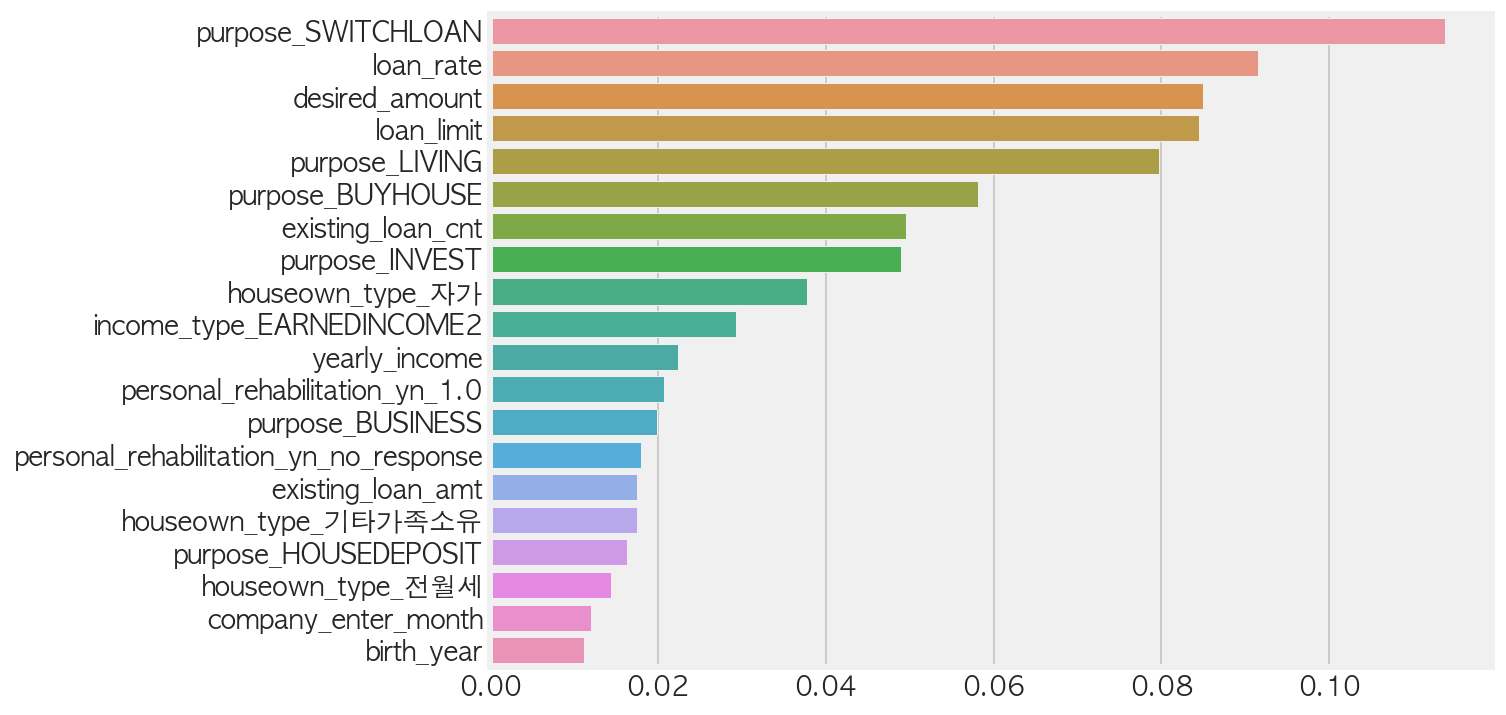

In [201]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

xgb1=XGBRegressor(colsample_bytree=0.7, learning_rate=0.07, max_depth=7, min_child_weight=4, 
                 n_estimators=500, nthread=4, silent=1, subsample=0.7 )
xgb1.fit(train_x,train_y)


# train rmse
train_predict = xgb1.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))) )
 
# validation rmse
valid_predict = xgb1.predict(valid_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, valid_y))) )

#변수중요도 시각화 
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 

ftr_importances_values = xgb1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

Text(0.5, 1.0, 'credit score prediction by randomforest')

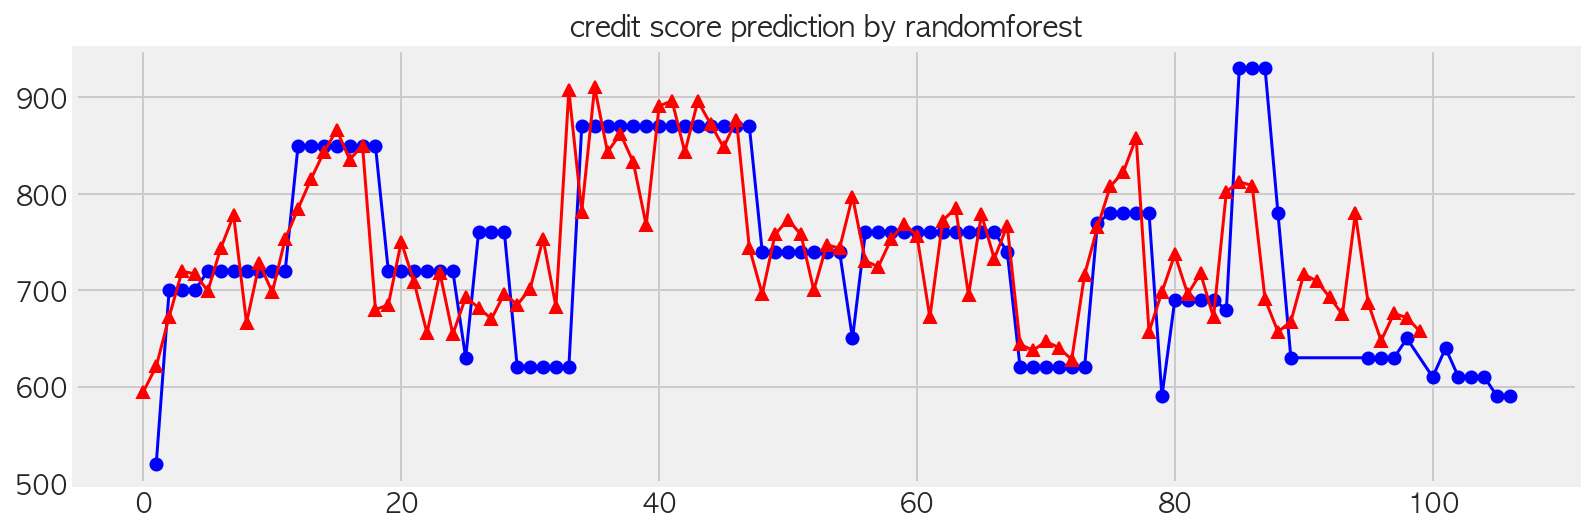

In [202]:

#visualization
fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(valid_y[:100], marker="o", color="blue",label="true value")
graph.plot(valid_predict[:100], marker="^", color="red",label="prediction value" )
graph.set_title("credit score prediction by randomforest")




Text(0.5, 1.0, 'credit score prediction by randomforest')

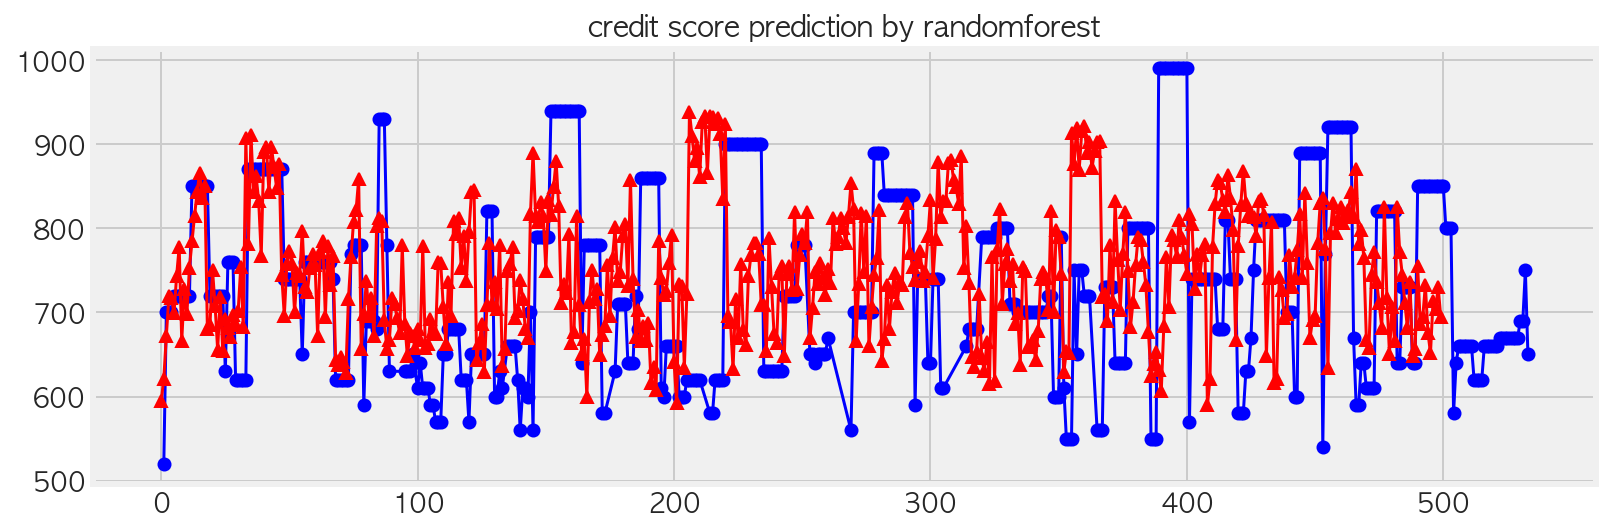

In [203]:
fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(valid_y[:500], marker="o", color="blue",label="true value")
graph.plot(valid_predict[:500], marker="^", color="red",label="prediction value" )
graph.set_title("credit score prediction by randomforest")



In [204]:
## 저장
#train3 : credit_score가 NA가 아닌경우만
#test3 : 이후 predict할때 넣으니까 행 개수가 달라지면 안돼!!

print(train3_fillna.isna().sum().sum())
print(test3_fillna.isna().sum().sum())
print(train3_fillna.shape)
print(test3_fillna.shape)

print(train3.shape)
print(test3.shape)
train3 = pd.get_dummies(train3)
test3 = pd.get_dummies(test3)
test3 = test3.reindex(columns = train3.columns, fill_value=0)

print(train3.shape)
print(test3.shape)
print(train3.isna().sum().sum())
print(test3.isna().sum().sum())


train_x = train3.drop(["credit_score"], axis=1)
test_x = test3.drop(["credit_score"], axis=1)
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)


print(train_x.shape)
print(test_x.shape)

1111041
3520803
(10264349, 24)
(3255482, 24)
(10264349, 17)
(3255482, 17)
(10264349, 41)
(3255482, 41)
1111041
265321
(10264349, 40)
(3255482, 40)


In [205]:
#predict
train_predict = xgb1.predict(train_x)
valid_predict = xgb1.predict(test_x)

print(train_predict.shape)
print(valid_predict.shape)

train3_fillna["credit_score2"]=pd.DataFrame(train_predict)
test3_fillna["credit_score2"]=pd.DataFrame(valid_predict)



# 결측치이면 credit_score_y 대체
train3_fillna["credit_score"].fillna(train3_fillna["credit_score2"], inplace=True)
test3_fillna["credit_score"].fillna(test3_fillna["credit_score2"], inplace=True)

# 불필요한 열 삭제 
del train3_fillna['credit_score2']
del test3_fillna['credit_score2']

print(train3_fillna.shape)
print(test3_fillna.shape)

(10264349,)
(3255482,)
(10264349, 24)
(3255482, 24)


In [206]:
print(train3_fillna.isna().sum())
print(test3_fillna.isna().sum())

application_id                         0
loanapply_insert_time                  0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
user_id                                0
birth_year                             0
gender                                 0
insert_time                            0
credit_score                           0
yearly_income                          0
income_type                            0
company_enter_month                    0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
isjob                                  0
dtype: int64
app

In [208]:
#저장
train3_fillna.to_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/train_1011_2.csv', index=False)
test3_fillna.to_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/test_1011_2.csv', index=False)

